In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [27]:
df = pd.read_excel("Data-20251101/epfl_gym_wait_times_study.xlsx")

# --- columns ---
x = df["Utilization_Rate"]                 # U
y = df["Average_Wait_Time_Minutes"]        # Wait
x_prime = df["Students_Present"] 

mask = (~x.isna()) & (~y.isna())
U = x[mask].to_numpy()  # Utilization
W = y[mask].to_numpy()  # Wait time (minutes)

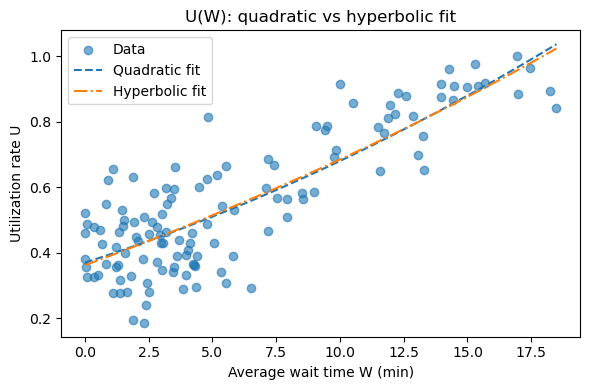

In [28]:
def quad_UW(W, a, b, c):
    return a + b*W + c*W**2

# Hyperbolic in W: U = a + b * W / (1 + c W)
def hyper_UW(W, a, b, c):
    return a + b * W / (1.0 + c*W)

W_fit2 = W  # same mask as before
U_fit2 = U

# Fit quadratic U(W)
popt_quad_UW, _ = curve_fit(
    quad_UW,
    W_fit2,
    U_fit2,
    p0=[U_fit2.mean(), 0.0, 0.0]
)

# Fit hyperbolic U(W)
popt_hyp_UW, _ = curve_fit(
    hyper_UW,
    W_fit2,
    U_fit2,
    p0=[U_fit2.min(), 0.1, 0.01],
    maxfev=10000
)

# Grid for smooth curves in W
W_grid = np.linspace(W_fit2.min(), W_fit2.max(), 300)
U_quad_pred = quad_UW(W_grid, *popt_quad_UW)
U_hyp_pred  = hyper_UW(W_grid, *popt_hyp_UW)

# Plot U(W)
plt.figure(figsize=(6, 4))
plt.scatter(W_fit2, U_fit2, alpha=0.6, label="Data")
plt.plot(W_grid, U_quad_pred, linestyle="--", label="Quadratic fit")
plt.plot(W_grid, U_hyp_pred, linestyle="-.", label="Hyperbolic fit")
plt.xlabel("Average wait time W (min)")
plt.ylabel("Utilization rate U")
plt.title("U(W): quadratic vs hyperbolic fit")
plt.legend()
plt.tight_layout()

plt.show()

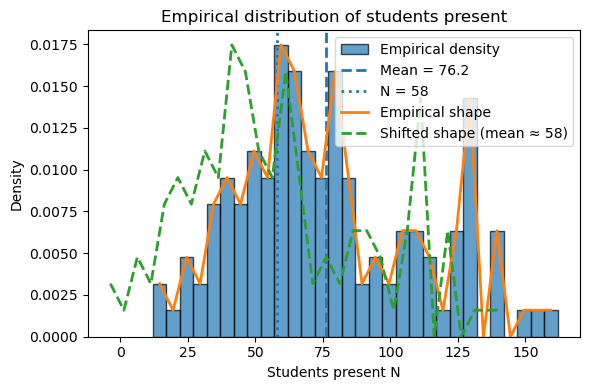

In [29]:
N = df["Students_Present"].dropna().to_numpy().astype(float)

# Histogram settings
bin_width = 5
bins = np.arange(N.min(), N.max() + bin_width, bin_width)

# Current mean and desired mean
N_mean = N.mean()
target_mean = 58.0
shift = target_mean - N_mean

# Histogram (density) for original data
hist, edges = np.histogram(N, bins=bins, density=True)
centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(6, 4))

# Plot histogram of original data
plt.hist(N, bins=bins, density=True, alpha=0.7,
         edgecolor="black", label="Empirical density")

# Vertical lines at original mean and at N = 58
plt.axvline(N_mean, linestyle="--", linewidth=2,
            label=f"Mean = {N_mean:.1f}")
plt.axvline(target_mean, linestyle=":", linewidth=2,
            label=f"N = {target_mean:.0f}")

# Line for original empirical distribution (using bin centers)
plt.plot(centers, hist, linewidth=2, label="Empirical shape")

# Same shape, shifted so its mean is 58
centers_shifted = centers + shift
plt.plot(centers_shifted, hist, linewidth=2, linestyle="--",
         label=f"Shifted shape (mean ≈ {target_mean:.0f})")

plt.xlabel("Students present N")
plt.ylabel("Density")
plt.title("Empirical distribution of students present")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# mask_N = (~x_prime.isna()) & (~y.isna())
# N = x_prime[mask_N].to_numpy()   # Students present
# W = y[mask_N].to_numpy()         # Wait time (min)
# N = x_prime[mask_N].to_numpy()

# # Quadratic: W = a + b N + c N^2
# def quad_WN(N, a, b, c):
#     return a + b*N + c*N**2

# # Hyperbolic: W = a + b * N / (1 - c N)
# def hyper_WN(N, a, b, c):
#     return a + b * N / (1.0 - c*N)

# # Quadratic fit
# popt_quad_WN, _ = curve_fit(
#     quad_WN,
#     N,
#     W,
#     p0=[W.mean(), 0.0, 0.0]
# )

# # Hyperbolic fit (use small c init, more iterations)
# popt_hyp_WN, _ = curve_fit(
#     hyper_WN,
#     N,
#     W,
#     p0=[W.min(), 0.01, 1e-4],
#     maxfev=10000
# )

# # Predictions on original N for R²
# W_quad_pred = quad_WN(N, *popt_quad_WN)
# W_hyp_pred  = hyper_WN(N, *popt_hyp_WN)

# # =====================================================
# # 3) Compute R² for both models
# # =====================================================

# def r2_score(y_true, y_pred):
#     ss_res = np.sum((y_true - y_pred)**2)
#     ss_tot = np.sum((y_true - y_true.mean())**2)
#     return 1 - ss_res / ss_tot

# r2_quad_WN = r2_score(W, W_quad_pred)
# r2_hyp_WN  = r2_score(W, W_hyp_pred)

# print(f"R^2 (quadratic W(N)):  {r2_quad_WN:.4f}")
# print(f"R^2 (hyperbolic W(N)): {r2_hyp_WN:.4f}")

# N_grid = np.linspace(N.min(), N.max(), 300)
# W_quad_grid = quad_WN(N_grid, *popt_quad_WN)
# W_hyp_grid  = hyper_WN(N_grid, *popt_hyp_WN)

# plt.figure(figsize=(6, 4))
# plt.scatter(N, W, alpha=0.6, label="Data")
# plt.plot(N_grid, W_quad_grid, linestyle="--", label="Quadratic fit")
# plt.plot(N_grid, W_hyp_grid, linestyle="-.", label="Hyperbolic fit")
# plt.xlabel("Students present N")
# plt.ylabel("Average wait time W (min)")
# plt.title("W(N): quadratic vs hyperbolic fit")
# plt.legend()
# plt.tight_layout()
# plt.show()